In [6]:
import sklearn

In [5]:
import numpy

In [2]:
import pandas as pd

In [4]:
train=pd.read_csv("train.csv")

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [11]:
train=train.apply(le.fit_transform)

In [12]:
x=train.drop('SalePrice',axis=1)

In [13]:
y=train['SalePrice']

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
etc=ExtraTreesClassifier()

In [58]:
trainx

,SaleCondition,SaleType,YrSold,MoSold,MiscVal,MiscFeature,Fence,PoolQC,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,PavedDrive
0,4,8,2,1,0,4,4,3,0,0,0,0,49,0,2
1,4,8,1,4,0,4,4,3,0,0,0,0,0,187,2
2,4,8,2,8,0,4,4,3,0,0,0,0,30,0,2
3,0,8,0,1,0,4,4,3,0,0,0,108,24,0,2
4,4,8,2,11,0,4,4,3,0,0,0,0,70,118,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,8,1,7,0,4,4,3,0,0,0,0,28,0,2
1456,4,8,4,1,0,4,2,3,0,0,0,0,0,214,2
1457,4,8,4,4,17,2,0,3,0,0,0,0,48,0,2
1458,4,8,4,3,0,4,4,3,0,0,0,38,0,224,2


In [18]:
from sklearn.feature_selection import SelectKBest, chi2

In [19]:
bestfeature=SelectKBest(score_func=chi2,k=10)

In [53]:
bf=bestfeature.fit(trainx,y)

In [28]:
bf.scores_

array([3.65060135e+00, 4.18733575e+00, 2.66863028e+01, 2.73364812e+01,
       2.84908343e+01, 4.47326705e+01, 4.65139968e+01, 5.38023349e+01,
       6.65724319e+01, 6.76132408e+01, 8.77695965e+01, 9.32892554e+01,
       9.75197544e+01, 1.08800850e+02, 1.13803139e+02, 1.18159077e+02,
       1.24357379e+02, 1.70705545e+02, 1.79095623e+02, 1.87470404e+02,
       1.88851267e+02, 1.95208250e+02, 1.97353025e+02, 2.09777237e+02,
       2.12586578e+02, 2.12616289e+02, 2.13594275e+02, 2.29029740e+02,
       2.42333333e+02, 3.02333392e+02, 3.03823780e+02, 3.24554492e+02,
       3.56053615e+02, 3.67698026e+02, 4.33653719e+02, 4.48324316e+02,
       4.52220462e+02, 4.66596456e+02, 5.18487978e+02, 5.20704617e+02,
       5.64633630e+02, 5.70507272e+02, 5.97224646e+02, 6.00010191e+02,
       6.66750805e+02, 6.96025906e+02, 8.02972897e+02, 8.08619925e+02,
       8.12887720e+02, 8.36377738e+02, 8.82582636e+02, 8.89793781e+02,
       1.26492987e+03, 1.48314493e+03, 1.95147825e+03, 2.19426711e+03,
      

In [34]:
df=pd.DataFrame(index=x.columns,data=bf.scores_)

In [46]:
df=df.nlargest(15,'Scores')

In [51]:
trainx=x[idx]

In [39]:
df.columns=['Scores']

In [70]:
idx=df.index

In [71]:
idx

Index(['SaleCondition', 'SaleType', 'YrSold', 'MoSold', 'MiscVal',
       'MiscFeature', 'Fence', 'PoolQC', 'PoolArea', 'ScreenPorch',
       '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF',
       'PavedDrive'],
      dtype='object')

In [63]:
cor=trainx.corr()

In [61]:
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns

<AxesSubplot:>

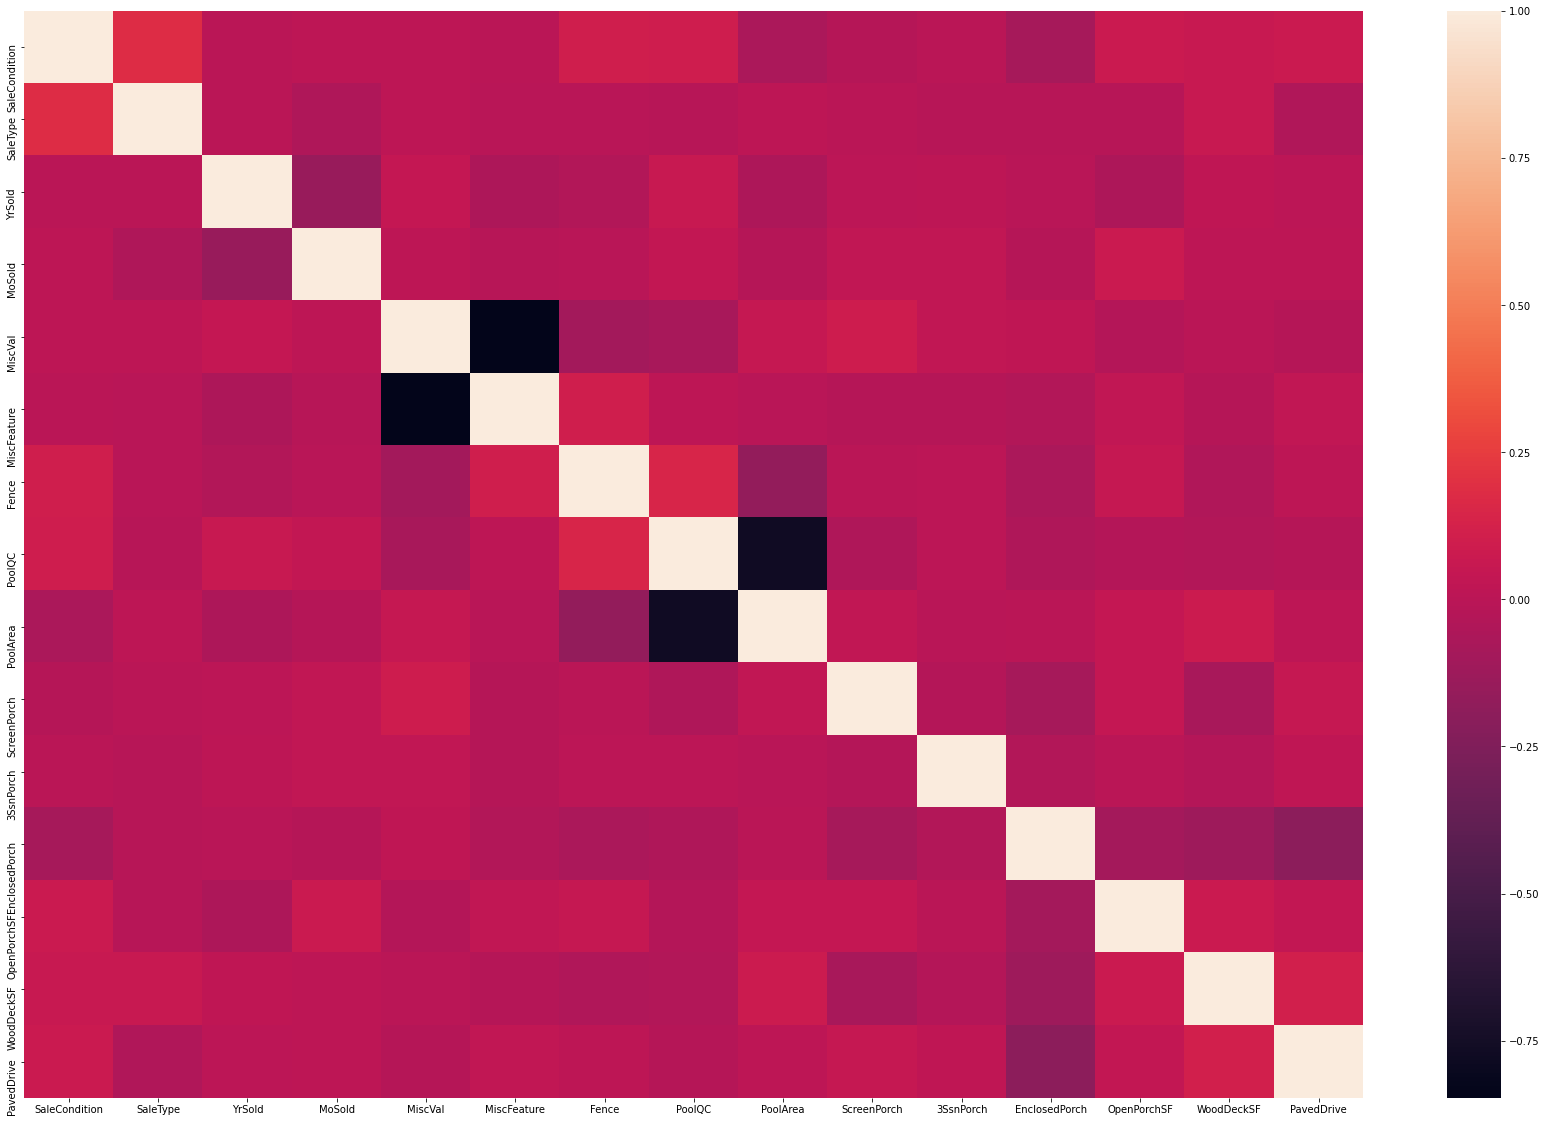

In [67]:
plt.figure(figsize=(30,20))
sns.heatmap(cor)

In [77]:
trainx=trainx.drop(['PoolArea','MiscFeature'],axis=1)

In [79]:
from sklearn.linear_model import LinearRegression

In [81]:
reg=LinearRegression()

In [82]:
reg.fit(trainx,y)

LinearRegression()

In [84]:
test=pd.read_csv("test.csv")

In [85]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
